In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.11.0


In [2]:
Mnist= keras.datasets.mnist

(train_images, train_labels),(test_images, test_labels)=Mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

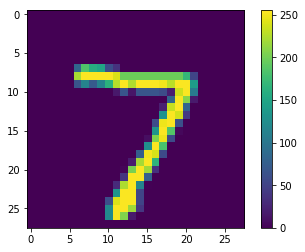

In [6]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

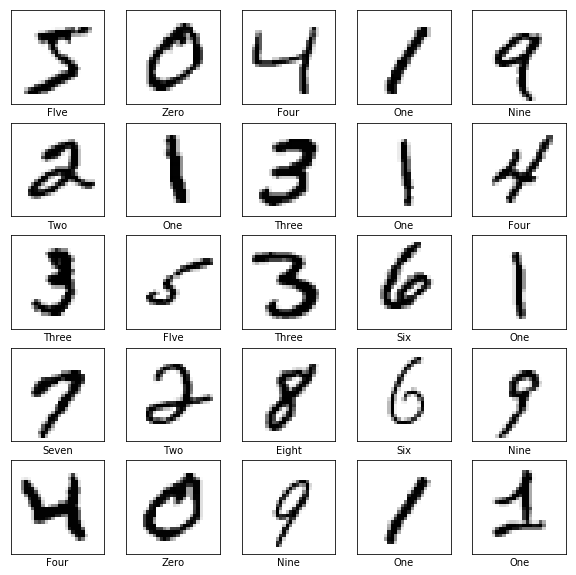

In [19]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'FIve', 'Six', 'Seven', 'Eight', 'Nine']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [44]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.2804 - acc: 0.9184
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.1286 - acc: 0.9606: 0s - loss: 0.1304
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0924 - acc: 0.9726
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0741 - acc: 0.9771
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0608 - acc: 0.9814


In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 54us/step
Test accuracy: 0.9742


In [48]:
predictions = model.predict(test_images)

In [49]:
predictions[0]

array([4.7507111e-08, 2.1007949e-07, 1.3991749e-05, 1.1047041e-05,
       8.1870000e-10, 1.4708296e-07, 2.6902892e-12, 9.9996781e-01,
       9.4191641e-08, 6.6063417e-06], dtype=float32)

In [50]:
np.argmax(predictions[0])

7

In [51]:
test_labels[0]

7

In [40]:
predictions = model.predict(test_images)

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 38us/step
Test accuracy: 0.9751


In [56]:
from keras.models import load_model

model.save('my_model.h5')